In [1]:
from typing import Dict, Iterable, Optional

import numpy as np
import torch
from torch.distributions import Normal, Poisson
from torch.distributions import kl_divergence as kld
from torch import tensor
import scanpy as sc
import anndata
import pandas as pd
import tools
import logging
import mira

/home/haiyi/anaconda3/envs/halo2/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
## model setup
atac_model = mira.topics.AccessibilityTopicModel(counts_layer='counts',
                                                 dataset_loader_workers = 3)

rna_model = mira.topics.ExpressionTopicModel(
    endogenous_key='endog',
    exogenous_key='endog',
    counts_layer='counts',
    seed = 0,
    hidden=64, # to make the tutorial faster. In practice, use the default of 128!
)          


rna_model = mira.topics.ExpressionTopicModel.load('MIRA/hair_rna_topic_model.pth')
atac_model = mira.topics.AccessibilityTopicModel.load('MIRA/hair_atac_topic_model.pth')

INFO:mira.topic_model.base:Moving model to CPU for inference.
INFO:mira.topic_model.base:Moving model to device: cpu
INFO:mira.topic_model.base:Moving model to CPU for inference.
INFO:mira.topic_model.base:Moving model to device: cpu


In [3]:
rna_data = anndata.read_h5ad("mira-datasets/shareseq_annotated_data/rna_data.joint_representation.rp_modeled.h5ad")
atac_data = anndata.read_h5ad("mira-datasets/shareseq_annotated_data/atac_data.joint_representation.motif_calls.tss_annotated.h5ad")

In [22]:
## loading the data
rna_data = anndata.read_h5ad("data/datasets/mouse_hair_rna_interim.h5ad")
atac_data =  anndata.read_h5ad("data/datasets/mouse_hair_atac_interim.h5ad")

In [23]:
rna_data.var[rna_data.var.highly_variable==True]

,feature_types,modality,n_cells,highly_variable,means,dispersions,dispersions_norm,exog,endog
index,,,,,,,,,
Abcf2,Gene Expression,Gene Expression,492,True,1.619382,4.389581,0.627253,True,False
Adamts9,Gene Expression,Gene Expression,401,True,1.612930,4.541856,2.359316,True,True
Aff3,Gene Expression,Gene Expression,1359,True,2.767782,4.530842,0.894974,True,True
Agl,Gene Expression,Gene Expression,408,True,1.457034,4.354157,0.224318,True,False
Akt2,Gene Expression,Gene Expression,317,True,1.241102,4.380297,0.505747,True,False
...,...,...,...,...,...,...,...,...,...
Ythdc2,Gene Expression,Gene Expression,520,True,1.655478,4.364199,0.338543,True,False
Zfp385a,Gene Expression,Gene Expression,341,True,1.346509,4.413190,0.829114,True,True
Zfp462,Gene Expression,Gene Expression,442,True,1.593190,4.430925,1.097520,True,True


In [24]:
rna_model.predict(rna_data)
# rna_data.write_h5ad("data/datasets/mouse_hair_")

Predicting latent vars: 100%|██████████| 13/13 [00:01<00:00, 10.71it/s]
INFO:mira.adata_interface.core:Added key to obsm: X_topic_compositions
INFO:mira.adata_interface.topic_model:Added cols: topic_0, topic_1, topic_2, topic_3, topic_4, topic_5, topic_6, topic_7, topic_8, topic_9, topic_10, topic_11, topic_12, topic_13
INFO:mira.adata_interface.core:Added key to varm: topic_feature_compositions
INFO:mira.adata_interface.core:Added key to varm: topic_feature_activations
INFO:mira.adata_interface.topic_model:Added key to uns: topic_dendogram


In [25]:
atac_data.layers["counts"] =atac_data.X.copy()
rna_data.layers["counts"] =rna_data.X.copy()


In [26]:
atac_model.predict(atac_data)

Predicting latent vars: 100%|██████████| 13/13 [00:12<00:00,  1.06it/s]
INFO:mira.adata_interface.core:Added key to obsm: X_topic_compositions
INFO:mira.adata_interface.topic_model:Added cols: topic_0, topic_1, topic_2, topic_3, topic_4, topic_5, topic_6, topic_7, topic_8
INFO:mira.adata_interface.core:Added key to varm: topic_feature_compositions
INFO:mira.adata_interface.core:Added key to varm: topic_feature_activations
INFO:mira.adata_interface.topic_model:Added key to uns: topic_dendogram


In [27]:
rna_data.write_h5ad("data/datasets/mouse_hair_mira_rna.h5ad")
atac_data.write_h5ad("data/datasets/mouse_hair_mira_atac.h5ad")


In [41]:
rna_data = sc.read_h5ad("data/datasets/mouse_hair_mira_rna.h5ad")
atac_data = sc.read_h5ad("data/datasets/mouse_hair_mira_atac.h5ad")

In [34]:
mira.datasets.mm10_chrom_sizes()
mira.datasets.mm10_tss_data()

INFO:mira.datasets.datasets:Dataset already on disk.
INFO:mira.datasets.datasets:Dataset contents:
	* mira-datasets/mm10.chrom.sizes
INFO:mira.datasets.datasets:Dataset already on disk.
INFO:mira.datasets.datasets:Dataset contents:
	* mira-datasets/mm10_tss_data.bed12


In [38]:
## ATAC data get TSS annotation

mira.tl.get_distance_to_TSS(atac_data,
                            tss_data='mira-datasets/mm10_tss_data.bed12',
                            genome_file='mira-datasets/mm10.chrom.sizes')

INFO:mira.tools.connect_genes_peaks:Finding peak intersections with promoters ...
INFO:mira.tools.connect_genes_peaks:Calculating distances between peaks and TSS ...
INFO:mira.tools.connect_genes_peaks:Masking other genes' promoters ...
INFO:mira.adata_interface.rp_model:Added key to var: distance_to_TSS
INFO:mira.adata_interface.rp_model:Added key to uns: distance_to_TSS_genes


In [23]:
atac_data.write_h5ad("data/datasets/mouse_hair_mira_atac.h5ad")

In [5]:
del rna_data.obsm["X_topic_compositions"]

In [49]:
rna_data.var.index = rna_data.var.index.str.upper()
rp_args = dict(expr_adata = rna_data, atac_adata= atac_data)
rp_genes = list(rna_model.features[rna_model.highly_variable])
rp_genes = [str(e).upper() for e in rp_genes]
lgenes = ['Gna12', 'Dmpk', 'Ubtf', 'Nfe2l3', 'Cspp1', 'Wdr47', 'Ptpra', 'Mfsd2a',
       'Nedd9', 'Lrp4', 'Myo9a', 'Tfap2b', 'Zfand5', 'Hs3st3b1', 'Orc1',
       'Inpp5f', 'Lama5', 'Akap10', 'Mylk', 'Heg1', 'Agl', 'Safb2', 'Brd9',
       'Rnf180', 'Itgb5', 'Bmp2k', 'Fnbp1l', 'Cpt1a', 'Ccnt1', 'Slc7a6'] + ['Mt2', 'Krt23', 'Braf', 'Slc4a7', 'Lonrf3', 'Fam126b', 'Gpatch1',
       'Sdf4', 'Cers4', 'R3hdm2', 'Nbea', 'Rnf10', 'Ppp1r14c', 'Kremen1',
       'Nav2', '5031439G07Rik', 'Ythdf1', 'Galnt3', 'Setd7', 'Spata5',
       'Arhgef10l', 'Cep128', 'Ltbp3', 'Ranbp1', 'Atg7', 'Tcf3', 'Ddx52',
       'BC005561', 'Psrc1', 'Chd3']
irs_genes = ["CALM2", "CTSB"]       
lgenes = [str(e).upper() for e in lgenes]

rp_genes = rp_genes + lgenes
# rp_genes=["Chd3"]

In [95]:
[e for e in rna_data.var.index if e in ["CALM2", "HMGB2", "TMSB10", "CTSB", "MGST1", "LYPD3", "TAF13"]]

[]

In [50]:
litemodel = mira.rp.LITE_Model(expr_model = rna_model,
                              accessibility_model=atac_model,
                              counts_layer='counts',
                              genes = rp_genes)

In [51]:
litemodel.fit(**rp_args, n_workers=4,
              callback = mira.rp.SaveCallback("rpmodels/hair/"))

INFO:mira.adata_interface.topic_model:Fetching key X_topic_compositions from obsm
Calculating softmax summary data: 100%|██████████| 13/13 [00:00<00:00, 599.06it/s]
INFO:mira.adata_interface.core:Added cols to obs: softmax_denom
INFO:mira.adata_interface.topic_model:Fetching key X_topic_compositions from obsm
Calculating softmax summary data: 100%|██████████| 13/13 [00:01<00:00, 11.79it/s]
INFO:mira.adata_interface.core:Added cols to obs: softmax_denom
Fitting models:   1%|          | 6/1019 [00:00<02:13,  7.59it/s]

Fitting models:   2%|▏         | 19/1019 [00:05<03:29,  4.78it/s]

RuntimeError: Parent directory rpmodels/hair/2 does not exist.

In [52]:
litemodel.load("rpmodels/hair/")

In [53]:
rna_data.var.index = rna_data.var.index.str.upper()
rna_data.obs["latent_time_cat"] = pd.cut(rna_data.obs['latent_time'], 20, labels=[str(i) for i in range(20)])
rna_data.obs["latent_time_2"] = pd.cut(rna_data.obs['latent_time'], 50, labels=[str(i) for i in range(50)])
rna_data.obs["latent_time_10"] = pd.cut(rna_data.obs['latent_time'], 10, labels=[str(i) for i in range(10)])
rna_data.obs["latent_time_3"] = pd.cut(rna_data.obs['latent_time'], 5, labels=[str(i) for i in range(5)])
rna_data.obs["latent_time_8"] = pd.cut(rna_data.obs['latent_time'], 8, labels=[str(i) for i in range(8)])
rna_data.obs["latent_time_6"] = pd.cut(rna_data.obs['latent_time'], 6, labels=[str(i) for i in range(6)])

In [54]:
### Plot local genes and local peaks
from scipy.sparse import csr_matrix
from scipy.sparse import diags


def tfidf_norm(adata_atac, scale_factor=1e4):
    """TF-IDF normalization.
    This function normalizes counts in an AnnData object with TF-IDF.
    Parameters
    ----------
    adata_atac: :class:`~anndata.AnnData`
        ATAC anndata object.
    scale_factor: `float` (default: 1e4)
        Value to be multiplied after normalization.
    copy: `bool` (default: `False`)
        Whether to return a copy or modify `.X` directly.
    Returns
    -------
    If `copy==True`, a new ATAC anndata object which stores normalized counts in `.X`.
    """
    npeaks = adata_atac.X.sum(1)
    npeaks_inv = csr_matrix(1.0/npeaks)
    tf = adata_atac.X.multiply(npeaks_inv)
    idf = diags(np.ravel(adata_atac.X.shape[0] / adata_atac.X.sum(0))).log1p()
    new_X = tf.dot(idf) * scale_factor
    return new_X


In [209]:
## add normalized layers 
rna_norm = sc.read_h5ad("data/datasets/mouse_hair_mira_rna_norm.h5ad")
atac_norm = sc.read_h5ad("data/datasets/mouse_hair_mira_atac_norm.h5ad")

In [210]:
rna_data.layers["norm"] = rna_norm.layers["norm"]
atac_data.layers["norm"] = atac_norm.layers["norm"]

In [64]:
norm_X = atac_norm.layers["norm"]
# norm_X = tfidf_norm(atac_data)

In [57]:
def aggregate_local_atac(table, norm_X, atac_data):
    indices = table.index.to_numpy()
    col_index = [atac_data.var.index.get_loc(e) for e in indices]
    gene_peaks = norm_X[:, col_index]
    # print(norm_X.shape)
    gene_peaks = np.sum(gene_peaks, axis=1)
    
    return gene_peaks

def get_gene_local_atac(genename, litemodel, rna_data, atac_data, norm_X):
    table = litemodel[genename].get_influential_local_peaks(atac_data, decay_periods = 8.)
    peaks = aggregate_local_atac(table, norm_X,atac_data)
    rna_data.obs["local_peaks"] = peaks

def get_gene_local_atac_mtx(genenames, litemodel, rna_data, atac_data, norm_X):
    for genename in genenames:
        table = litemodel[genename].get_influential_local_peaks(atac_data, decay_periods = 8.)
        peaks = aggregate_local_atac(table, norm_X)
        name = genename+"local_peaks"
        rna_data.obs[name] = peaks


In [58]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def get_norm_gene_local(genename,time):
    peak_mean = rna_data.obs.groupby(time)["local_peaks"].mean()
    rna_data.obs["temp_gene"] =  rna_data[:,[genename.capitalize()]].X.toarray()
    gene_mean = rna_data.obs.groupby(time)["temp_gene"].mean()
    timelist = rna_data.obs.time.unique().tolist()
    genesplie = make_interp_spline(np.array(timelist), gene_mean.value)

    df = pd.DataFrame([peak_mean, gene_mean, genesplie]).T
    df = df.reset_index()
    fig, ax = plt.subplots()
    df.plot(x=time, y = "local_peaks", ax=ax)
    df.plot(x=time, y = "temp_gene", ax=ax,secondary_y=True, color="r")



In [59]:
def smooth_gene_peaks_plot(genename,time, linewidth, points=1000, save=False, legend=True):
    peak_mean = rna_data.obs.groupby(time)["local_peaks"].mean()
    rna_data.obs["temp_gene"] =   rna_data[:,[genename.upper()]].X.toarray()
    gene_mean = rna_data.obs.groupby(time)["temp_gene"].mean()
    timelist = rna_data.obs[time].unique()
    timelist = timelist.astype(np.float64)
    timelist = sorted(timelist)
    genesplie = make_interp_spline(np.array(timelist), gene_mean.values)
    peaksplie = make_interp_spline(np.array(timelist), peak_mean.values)
    X_ = np.linspace(timelist[0], timelist[-1], points)
    smooth_gene = genesplie(X_)
    smooth_peaks = peaksplie(X_)
    df = pd.DataFrame(index=X_)
    df["smooth_gene"] = smooth_gene
    df["smooth_peaks"] = smooth_peaks
    df = df.reset_index() 
    fig, ax = plt.subplots()
    # ax.grid(True)
        
    df.plot(x="index", y = "smooth_peaks", ax=ax, linewidth=linewidth, legend=legend)
    df.plot(x="index", y = "smooth_gene", ax=ax,secondary_y=True, color="r", linewidth=linewidth, legend=legend)
    if save:
        fig.savefig(save)

In [60]:
## Causal Score function


from causal_utils import infer_nonsta_dir

def gene_level_casual(genename,time, litemodel,rna_data,atac_data, norm_X, width=0.1):
    get_gene_local_atac(genename, litemodel, rna_data, atac_data, norm_X)
    # peak_mean = rna_data.obs.groupby(time)["local_peaks"].mean().values
    rna_data.obs["temp_gene"] =   rna_data[:,[genename.upper()]].X.toarray()
    peaks = rna_data.obs["local_peaks"]
    genes = rna_data.obs["temp_gene"]
    times = rna_data.obs[time]
    # print("peaks shap {}, genes {}, time {}".format(peaks.shape, genes.shape, times.shape))
    gene_mean = genes
    peak_mean = peaks
    timelist = times
    # gene_mean = rna_data.obs.groupby(time)["temp_gene"].mean().values
    gene_mean = np.expand_dims(gene_mean, axis=1)
    peak_mean = np.expand_dims(peak_mean, axis=1)
    # timelist = rna_data.obs[time].unique()
    timelist = timelist.astype(np.float64)
    timelist = sorted(timelist)
    timelist = np.expand_dims(timelist, axis=1)

    score_ar, _, _ = infer_nonsta_dir(peak_mean, gene_mean, timelist, width=0.1)
    score_ra, _, _ =infer_nonsta_dir(gene_mean, peak_mean, timelist, width=0.1)
    # score_ar = np.log(score_ar)
    # score_ra = np.log(score_ra)
    score = score_ar - score_ra

    return score, score_ar, score_ra



def gene_level_casual_nonzero(genename,time, litemodel,rna_data,atac_data, norm_X, width=0.1, thresh=0.001):
    get_gene_local_atac(genename, litemodel, rna_data, atac_data, norm_X)
    # peak_mean = rna_data.obs.groupby(time)["local_peaks"].mean().values
    rna_data.obs["temp_gene"] =   rna_data[:,[genename.upper()]].X.toarray()
    peaks = rna_data.obs[rna_data.obs.local_peaks>0]['local_peaks']
    genes = rna_data.obs[rna_data.obs.local_peaks>0]["temp_gene"]
    times = rna_data.obs[rna_data.obs.local_peaks>0][time]
    gene_mean = genes
    peak_mean = peaks
    timelist = times
    # gene_mean = rna_data.obs.groupby(time)["temp_gene"].mean().values
    gene_mean = np.expand_dims(gene_mean, axis=1)
    peak_mean = np.expand_dims(peak_mean, axis=1)
    # timelist = rna_data.obs[time].unique()
    timelist = timelist.astype(np.float64)
    timelist = sorted(timelist)
    timelist = np.expand_dims(timelist, axis=1)

    score_ar, _, _ = infer_nonsta_dir(peak_mean, gene_mean, timelist, width=width)
    score_ra, _, _ =infer_nonsta_dir(gene_mean, peak_mean, timelist, width=width)
    # score_ar = np.log(score_ar)
    # score_ra = np.log(score_ra)
    # score = -(score_ar - score_ra)
    score = -(score_ar - score_ra)
    decouple_score =  score_ar - score_ra - thresh

    return score, score_ar, score_ra, decouple_score


In [61]:
def smooth_gene_peaks_plot(genename,time, linewidth, points=1000, save=False, legend=True):
    peak_mean = rna_data.obs.groupby(time)["local_peaks"].mean()
    rna_data.obs["temp_gene"] =   rna_data[:,[genename.upper()]].X.toarray()
    gene_mean = rna_data.obs.groupby(time)["temp_gene"].mean()
    timelist = rna_data.obs[time].unique()
    timelist = timelist.astype(np.float64)
    timelist = sorted(timelist)
    genesplie = make_interp_spline(np.array(timelist), gene_mean.values)
    peaksplie = make_interp_spline(np.array(timelist), peak_mean.values)
    X_ = np.linspace(timelist[0], timelist[-1], points)
    smooth_gene = genesplie(X_)
    smooth_peaks = peaksplie(X_)
    df = pd.DataFrame(index=X_)
    df["smooth_gene"] = smooth_gene
    df["smooth_peaks"] = smooth_peaks
    df = df.reset_index() 
    fig, ax = plt.subplots()
    # ax.grid(True)
        
    df.plot(x="index", y = "smooth_peaks", ax=ax, linewidth=linewidth, legend=legend)
    df.plot(x="index", y = "smooth_gene", ax=ax,secondary_y=True, color="r", linewidth=linewidth, legend=legend)
    if save:
        fig.savefig(save)



def smooth_gene_peaks_plot_interv(genename,time, rna_data, linewidth, points=1000, save=False, legend=True, ticks=True, gcolor="b", pcolor="r", shade=0.3, title=False):
    localpeaks ="local_peaks"
    peak_mean = rna_data.obs[rna_data.obs.local_peaks>0].groupby(time)["local_peaks"].median()
    peak_std =  rna_data.obs[rna_data.obs.local_peaks>0].groupby(time)["local_peaks"].std()
    peak_max = rna_data.obs[rna_data.obs.local_peaks>0].groupby(time)[localpeaks].quantile(0.6)
    peak_min = rna_data.obs[rna_data.obs.local_peaks>0].groupby(time)[localpeaks].quantile(0.4)
    localpeaks = "local_peaks"
    rna_data.obs["temp_gene"] =   rna_data[:,[genename]].X.toarray()
    gene_mean = rna_data.obs[rna_data.obs.temp_gene>0].groupby(time)["temp_gene"].median()
    gene_std = rna_data.obs.groupby(time)["temp_gene"].std()

    # gene_max = rna_data.obs.groupby(time).apply(lambda g: g[g.temp_gene > g.temp_gene.quantile(.2)]).temp_gene.to_frame().groupby(time).mean().temp_gene.to_numpy() 
    # gene_min = rna_data.obs.groupby(time).apply(lambda g: g[g.temp_gene <= g.temp_gene.quantile(.9)]).temp_gene.to_frame().groupby(time).mean().temp_gene.to_numpy()

    gene_max = rna_data.obs[rna_data.obs.temp_gene>0].groupby(time)['temp_gene'].quantile(0.65)
    gene_min = rna_data.obs[rna_data.obs.temp_gene>0].groupby(time)['temp_gene'].quantile(0.35)


    timelist = rna_data.obs[time].unique()
    timelist = timelist.astype(np.float64)
    timelist = sorted(timelist)
    genesplie = make_interp_spline(np.array(timelist), gene_mean.values)
    peaksplie = make_interp_spline(np.array(timelist), peak_mean.values)
    X_ = np.linspace(timelist[0], timelist[-1], points)
    smooth_gene = genesplie(X_)
    smooth_peaks = peaksplie(X_)



    genesplie_max = make_interp_spline(np.array(timelist), gene_max)
    peaksplie_max = make_interp_spline(np.array(timelist), peak_max)
    smooth_gene_max = genesplie_max(X_)
    smooth_peaks_max = peaksplie_max(X_)
    

    # genesplie_min = make_interp_spline(np.array(timelist), gene_min.values)
    # peaksplie_min = make_interp_spline(np.array(timelist), peak_min.values)
    # smooth_gene_min = genesplie_min(X_)
    # smooth_peaks_min = peaksplie_min(X_)


    # genesplie_std = make_interp_spline(np.array(timelist), gene_std.values)
    # peaksplie_std = make_interp_spline(np.array(timelist), peak_std.values)
    # smooth_gene_std = genesplie_std(X_)
    # smooth_peaks_std = peaksplie_std(X_)
   

    genesplie_min = make_interp_spline(np.array(timelist), gene_min)
    peaksplie_min = make_interp_spline(np.array(timelist), peak_min)
    smooth_gene_min = genesplie_min(X_)
    smooth_peaks_min = peaksplie_min(X_)


    # print(smooth_gene_max)
    # print("+++++++++++")
    # print(smooth_gene_min)
    # print("++++++++++")
    # print(smooth_gene)

    fig, ax = plt.subplots()
    # ax.plot(X_,smooth_gene)
    # ax.fill_between(X_, smooth_gene_min, smooth_gene_max, color='b', alpha=.5)
    ax.axis('off')

    if title == True:
        ax.set_xlabel('latent time')
        ax.set_ylabel('gene expression', color=gcolor)
    ax.plot(X_,smooth_gene, color=gcolor)
    ax.fill_between(X_, smooth_gene_min, smooth_gene_max, color=gcolor, alpha=shade)
    if ticks == False:
        ax.set_yticks([])
        ax.set_xticks([])
    if  title==False:
        ax.set_xticklabels([])
        ax.set_yticklabels([])     
     


    # ax.fill_between(X_, smooth_gene-smooth_gene_std, smooth_gene+smooth_gene_std, color='b', alpha=.1)


    ax2 = ax.twinx()
    ax2.axis('off')

    if title ==True:
        ax2.set_ylabel('normalized peaks', color=pcolor)
    ax2.plot(X_,smooth_peaks, color=pcolor)
    # ax2.fill_between(X_, smooth_peaks-smooth_peaks_std, smooth_peaks + smooth_peaks_std, color='r', alpha=.1)
    ax2.fill_between(X_, smooth_peaks_min, smooth_peaks_max, color=pcolor, alpha=shade)
    if ticks==False:
        ax2.set_yticks([])
        ax2.set_xticks([])
    if  title==False:
        ax2.set_xticklabels([]) 
        ax2.set_yticklabels([])     


    # df = pd.DataFrame(index=X_)
    # df["smooth_gene"] = smooth_gene
    # df["smooth_peaks"] = smooth_peaks
    # df = df.reset_index() 
    # fig, ax = plt.subplots()
    # # ax.grid(True)
        
    # df.plot(x="index", y = "smooth_peaks", ax=ax, linewidth=linewidth, legend=legend)
    # df.plot(x="index", y = "smooth_gene", ax=ax,secondary_y=True, color="r", linewidth=linewidth, legend=legend)
    if save:
        fig.savefig(save, dpi=300)
        plt.close(fig)    # close the figure window
    

In [212]:

def smooth_gene_peaks_plot_interv_2(genename,time, litemodel, rna_data, atac_data, linewidth, norm_X,
points=1000, save=False, legend=True, ticks=True, gcolor="b", pcolor="r", shade=0.3, title=False):
    
    get_gene_local_atac(genename, litemodel, rna_data, atac_data, norm_X)
    localpeaks ="local_peaks"
    peak_mean = rna_data.obs.groupby(time)["local_peaks"].median()
    peak_max = rna_data.obs.groupby(time)[localpeaks].quantile(0.6)
    peak_min = rna_data.obs.groupby(time)[localpeaks].quantile(0.4)
    


    rna_data.obs["temp_gene"] =   rna_data[:,[genename]].X.toarray()
    gene_mean = rna_data.obs[rna_data.obs.temp_gene>=0].groupby(time)["temp_gene"].median()
    # gene_std = rna_data.obs.groupby(time)["temp_gene"].std()

    # gene_max = gene_mean + 0.5*gene_std
    # gene_min = gene_mean - 0.5*gene_std


    # gene_mean = rna_data.obs.groupby(time)["temp_gene"].median()
    gene_max = rna_data.obs.groupby(time)["temp_gene"].quantile(0.65)
    gene_min = rna_data.obs.groupby(time)["temp_gene"].quantile(0.35)
    # print(gene_mean.max())
    # print(gene_max)
    # print(gene_min)


    timelist = rna_data.obs[time].unique()
    timelist = timelist.astype(np.float64)
    timelist = sorted(timelist)
    genesplie = make_interp_spline(np.array(timelist), gene_mean.values)
    peaksplie = make_interp_spline(np.array(timelist), peak_mean.values)
    T = np.linspace(timelist[0], timelist[-1], points)
    smooth_gene = genesplie(T)
    smooth_peaks = peaksplie(T)



    genesplie_max = make_interp_spline(np.array(timelist), gene_max)
    peaksplie_max = make_interp_spline(np.array(timelist), peak_max)
    smooth_gene_max = genesplie_max(T)
    smooth_peaks_max = peaksplie_max(T)


    genesplie_min = make_interp_spline(np.array(timelist), gene_min)
    peaksplie_min = make_interp_spline(np.array(timelist), peak_min)
    smooth_gene_min = genesplie_min(T)
    smooth_peaks_min = peaksplie_min(T)


    smooth_gene[smooth_gene<0] = 0
    smooth_gene_min[smooth_gene_min<0] = 0
    smooth_gene_max[smooth_gene_max<0] = 0




    fig, ax = plt.subplots()

    if title == True:
        ax.set_xlabel('latent time')
        ax.set_ylabel('gene expression', color=gcolor)
    ax.plot(T,smooth_gene, color=gcolor)
    ax.fill_between(T, smooth_gene_min, smooth_gene_max, color=gcolor, alpha=shade)
    if ticks == False:
        ax.axis('off')

        ax.set_yticks([])
        ax.set_xticks([])
    if  title==False:
        ax.set_xticklabels([])
        ax.set_yticklabels([])     
    

    ax2 = ax.twinx()

    if title ==True:
        ax2.set_ylabel('normalized peaks', color=pcolor)
    ax2.plot(T,smooth_peaks, color=pcolor)
    # ax2.fill_between(T, smooth_peaks-smooth_peaks_std, smooth_peaks + smooth_peaks_std, color='r', alpha=.1)
    ax2.fill_between(T, smooth_peaks_min, smooth_peaks_max, color=pcolor, alpha=shade)
    if ticks==False:
        ax2.axis('off')

        ax2.set_yticks([])
        ax2.set_xticks([])
    if  title==False:
        ax2.set_xticklabels([]) 
        ax2.set_yticklabels([])     

    if save:
        fig.savefig(save, dpi=300)
        plt.close(fig)    # close the figure window
    

In [182]:
x = np.array([-3, 10, 9])
x[x<0] = 0
x


array([ 0, 10,  9])

In [55]:
from scipy.sparse import csr_matrix
from scipy.sparse import diags

def tfidf_norm(adata_atac, scale_factor=1e4):
    """TF-IDF normalization.
    This function normalizes counts in an AnnData object with TF-IDF.
    Parameters
    ----------
    adata_atac: :class:`~anndata.AnnData`
        ATAC anndata object.
    scale_factor: `float` (default: 1e4)
        Value to be multiplied after normalization.
    copy: `bool` (default: `False`)
        Whether to return a copy or modify `.X` directly.
    Returns
    -------
    If `copy==True`, a new ATAC anndata object which stores normalized counts in `.X`.
    """
    npeaks = adata_atac.X.sum(1)
    npeaks_inv = csr_matrix(1.0/npeaks)
    tf = adata_atac.X.multiply(npeaks_inv)
    idf = diags(np.ravel(adata_atac.X.shape[0] / adata_atac.X.sum(0))).log1p()
    new_X = tf.dot(idf) * scale_factor
    return new_X


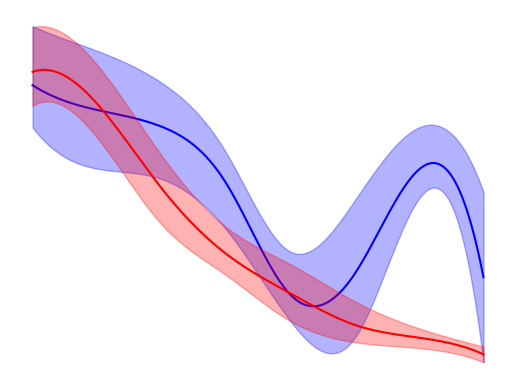

In [65]:
import warnings
genename = "MT2"
warnings.filterwarnings('ignore')
get_gene_local_atac(genename, litemodel, rna_data, atac_data, norm_X)
smooth_gene_peaks_plot_interv(genename, time="latent_time_8", rna_data=rna_data,  linewidth=1, ticks=True, title=True)

In [20]:
import warnings

se_gene = pd.read_csv("hair_gene_peak/scores.csv")
se_gene = se_gene.gene
path = "hair_gene_peak/super_enhancer/"
for genename in se_gene[:1]:
    warnings.filterwarnings('ignore')
    get_gene_local_atac(genename, litemodel, rna_data, atac_data, norm_X)
    # save = path+genename+".jpg"
    try:
        smooth_gene_peaks_plot_interv(genename, time="latent_time_8",  linewidth=1, ticks=True, title=True, gcolor="greenyellow", pcolor="darkviolet",save=None)
    except:
        print(genename)    
    # smooth_gene_peaks_plot_interv(genename, "latent_time_8",2, points=500, save=save, ticks=False, gcolor="greenyellow", pcolor="darkviolet", title=False)

IndexError: index 117431 is out of bounds for axis 1 with size 112656

In [41]:
## cortex 
subrna = rna_data[(rna_data.obs.celltype!="IRS")]
subrna = subrna[(subrna.obs.celltype!="Medulla")]
subatac = atac_data[(atac_data.obs.celltype!="IRS")]
subatac = subatac[(subatac.obs.celltype!="Medulla")]

path = "hair_gene_peak/super_enhancer/cortex/"
for genename in se_gene:
    warnings.filterwarnings('ignore')
    get_gene_local_atac(genename, litemodel, subrna, subatac, norm_X=subatac.layers["norm"])
    save = path+genename+".jpg"
    try:
        smooth_gene_peaks_plot_interv(genename, time="latent_time_8", rna_data=subrna,  linewidth=1, ticks=True, title=True, gcolor="greenyellow", pcolor="darkviolet",save=save)
    except:
        print(genename)    

AFF3
AZIN1
CGNL1
COL17A1
DNAJB1
EPHB6
FGFR1
FNDC3B
FST
HOXC13
IRX2
ISM1
ITGA6
KLF6
KRT17
MINK1
MT1
MTMR2
NFIL3
NFKBIA
OSBPL1A
PPP1R14C
PRKCD
PXN
RGMB
RIN2
SEMA4B
SGK1
SLC30A1
SLC7A6
TBC1D10A
TNS1


In [43]:
### medulla
subrna = rna_data[(rna_data.obs.celltype!="Medulla")]
subrna = subrna[(subrna.obs.celltype!="Hair Shaft-cuticle.cortex")]
subatac = atac_data[(atac_data.obs.celltype!="Medulla")]
subatac = subatac[(subatac.obs.celltype!="Hair Shaft-cuticle.cortex")]



path = "hair_gene_peak/super_enhancer/IRS/"
for genename in se_gene:
    warnings.filterwarnings('ignore')
    get_gene_local_atac(genename, litemodel, subrna, subatac, norm_X=subatac.layers["norm"])
    save = path+genename+".jpg"
    try:
        smooth_gene_peaks_plot_interv(genename, time="latent_time_8", rna_data=subrna,  linewidth=1, ticks=True, title=True, gcolor="greenyellow", pcolor="darkviolet",save=save)
    except:
        print(genename)    

CGNL1
EPHB6
FGFR1
HOXC13
MINK1
RGMB
RIN2
TNS1


In [ ]:
decouple_scores = []
couple_scores = []
# decouple_score_cortex = []
# couple_score_cortex = []
# decouple_score_medula = []
# couple_score_medula = []
for genename in se_gene:
    time = "latent_time"
    decouple_score, _, _, couple_score = gene_level_casual_nonzero(genename,time, litemodel,rna_data,atac_data, norm_X,width=0.1, thresh=1e-5)
    decouple_scores.append(decouple_score)
    couple_scores.append(couple_score)

In [553]:
inter_rp = set(se_gene)^ set(rp_genes)
len(inter_rp)

843

In [583]:
disp_filter = sc.pp.filter_genes_dispersion(rna_data.X, flavor='cell_ranger', n_top_genes=200, log=False)


In [585]:
rna_data.var["top200"] = disp_filter

In [588]:
top200 = [e[0] for e in disp_filter]
len(top200)

959

In [589]:
rna_data.var["top200"] =top200

In [590]:
rna_data.var

,feature_types,modality,n_cells,highly_variable,means,dispersions,dispersions_norm,exog,endog,top300,top200
index,,,,,,,,,,,
1700025G04RIK,Gene Expression,Gene Expression,1177,False,2.535499,4.398642,0.056588,False,False,False,False
2610507B11RIK,Gene Expression,Gene Expression,876,False,2.112825,4.291477,-0.596205,False,False,True,True
4833420G17RIK,Gene Expression,Gene Expression,648,False,1.849404,4.241606,-0.847347,False,False,False,False
5031439G07RIK,Gene Expression,Gene Expression,368,False,1.364747,4.306948,-0.215351,False,False,False,False
9930021J03RIK,Gene Expression,Gene Expression,787,False,2.047196,4.364122,0.098936,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
ZNHIT6,Gene Expression,Gene Expression,418,False,1.456709,4.282283,-0.593214,False,False,False,False
ZNRF1,Gene Expression,Gene Expression,1092,False,2.326576,4.282798,-0.662185,False,False,True,False
ZRANB3,Gene Expression,Gene Expression,309,False,1.289990,4.323316,-0.054443,False,False,False,False


In [591]:
topgenes = rna_data.var.index[rna_data.var.top200==True]
topgenes

Index(['2610507B11RIK', '9930021J03RIK', 'AAK1', 'ABCF2', 'AFF3', 'AGL',
       'AKAP10', 'ANKRD26', 'ANKRD52', 'AREG',
       ...
       'VPS37B', 'WDR47', 'WDR61', 'WNT5A', 'YAP1', 'ZDHHC13', 'ZFP185',
       'ZFP292', 'ZFYVE16', 'ZZEF1'],
      dtype='object', name='index', length=200)

In [601]:
top_nonovrelap =  list(set(topgenes)-set(se_gene))

In [67]:
score_df = pd.read_csv("hair_gene_peak/score_full.csv")
score_df

,Unnamed: 0,gene,decouple score,couple score,decouple_irs,couple_irs,decouple_medulla,couple_medulla,decouple_cortex,couple_cortex,super_enhancer,max_decouple,max_couple
0,0,ENOX1,-0.000945,0.000935,0.004521,-0.005521,0.003825,-0.003835,0.002865,-0.002875,False,0.004521,0.000935
1,1,DCTN1,0.018243,-0.018253,0.006778,-0.007778,0.008291,-0.008301,0.007041,-0.007051,False,0.018243,-0.007051
2,2,MAGI1,-0.000338,0.000328,0.002241,-0.003241,0.001318,-0.001328,0.004055,-0.004065,False,0.004055,0.000328
3,3,FBRSL1,0.010025,-0.010035,0.004106,-0.005106,0.005154,-0.005164,0.002251,-0.002261,False,0.010025,-0.002261
4,4,KIF15,0.015386,-0.015396,0.001594,-0.002594,0.001483,-0.001493,0.003783,-0.003793,False,0.015386,-0.001493
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,112,TRP53BP2,0.001324,-0.001334,0.002834,-0.002844,0.002834,-0.002844,0.008988,-0.008998,True,0.008988,-0.001334
271,113,VGLL4,0.003160,-0.003170,0.004661,-0.004671,0.004661,-0.004671,-0.002871,0.002861,True,0.004661,0.002861
272,114,ZFAND5,0.005131,-0.005141,0.005753,-0.005763,0.005753,-0.005763,0.003216,-0.003226,True,0.005753,-0.003226
273,115,ZFP750,0.001823,-0.001833,0.005073,-0.005083,0.005073,-0.005083,-0.000018,0.000008,True,0.005073,0.000008


In [77]:
score_df.to_csv("hair_gene_peak/score_full.csv")

In [68]:
score_df_melt = pd.melt(score_df, id_vars=["gene"], 
value_vars=["decouple score", "decouple_cortex","decouple_irs", "decouple_medulla", "max_decouple","couple score","couple_cortex","couple_irs", "couple_medulla","max_couple"])
score_df_melt

,gene,variable,value
0,ENOX1,decouple score,-0.000945
1,DCTN1,decouple score,0.018243
2,MAGI1,decouple score,-0.000338
3,FBRSL1,decouple score,0.010025
4,KIF15,decouple score,0.015386
...,...,...,...
2745,TRP53BP2,max_couple,-0.001334
2746,VGLL4,max_couple,0.002861
2747,ZFAND5,max_couple,-0.003226
2748,ZFP750,max_couple,0.000008


In [4]:
score_df_melt_all = score_df_melt[score_df_melt.gene.isin(["DNAJB1", "SIK1", "GRHL1", "MICAL3", "ACVR1B", "FNBP1", "DCTN1", "RGMB"])]
score_df_melt_all

,gene,variable,value
1,DCTN1,decouple score,0.018243
159,ACVR1B,decouple score,0.001306
181,DNAJB1,decouple score,0.012668
191,FNBP1,decouple score,0.001214
196,GRHL1,decouple score,0.006346
...,...,...,...
2666,FNBP1,max_couple,-0.001224
2671,GRHL1,max_couple,-0.001521
2697,MICAL3,max_couple,-0.000574
2721,RGMB,max_couple,-0.001131


In [7]:
score_df_melt_all.to_csv("hair_gene_peak/polar_decouple.csv")

In [22]:
import matplotlib.pyplot as plt
import plotly.express as px

plt.figure(figsize=(10,4))

fig = px.line_polar(score_df_melt_all, r="value", theta="variable", color="gene", line_close=True, markers=True,
                    color_discrete_sequence=px.colors.sequential.Plasma_r, range_r=[-0.01, 0.02])
                    # template="plotly_dark",)
fig.write_image('hair_gene_peak/decouple_polar.pdf')
fig

<Figure size 1000x400 with 0 Axes>

In [66]:
import seaborn as sns

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'decouple score'),
  Text(1, 0, 'decouple_cortex'),
  Text(2, 0, 'decouple_irs'),
  Text(3, 0, 'decouple_medulla'),
  Text(4, 0, 'max_decouple'),
  Text(5, 0, 'couple score'),
  Text(6, 0, 'couple_cortex'),
  Text(7, 0, 'couple_irs'),
  Text(8, 0, 'couple_medulla'),
  Text(9, 0, 'max_couple')])

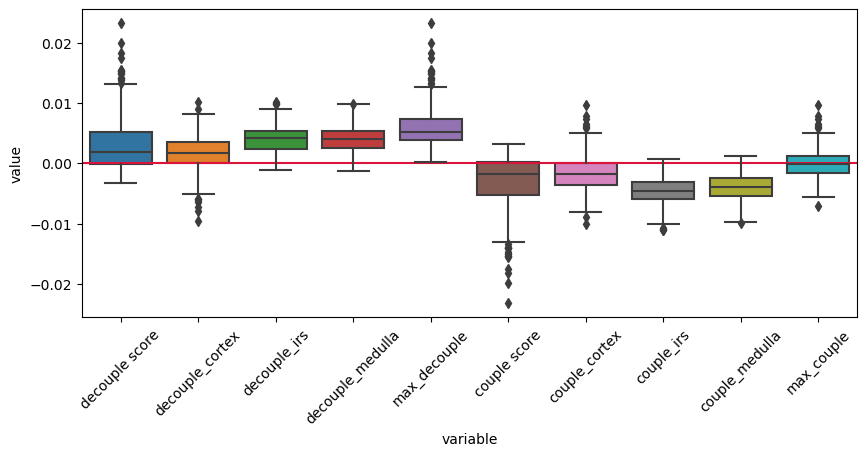

In [745]:
plt.figure(figsize=(10,4))
plt.axhline(y=0.0, color='crimson') 
sns.boxplot(data=score_df_melt, x="variable", y="value")
plt.xticks(rotation=45)

In [79]:
cell_cycle_df = pd.read_csv("hair_gene_peak/GO_term_summary_20240116_095743.txt", sep="\t")
cell_cycle_genes = cell_cycle_df["MGI Gene/Marker ID"].to_list()

In [80]:
cell_cycle_genes = [e.upper() for e in cell_cycle_genes]


In [794]:
score_df[score_df["couple score"] > 0].gene

0         ENOX1
2         MAGI1
7       CCDC171
9        NUP153
27          UST
         ...   
103        ST14
106      TFAP2A
108    TNFRSF19
111      TRIM29
116      ZMYND8
Name: gene, Length: 77, dtype: object

In [797]:
path = "hair_gene_peak/couple_genes/"
couple_genes = score_df[score_df["couple score"] > 0].gene
for genename in couple_genes:
    get_gene_local_atac(genename, litemodel, rna_data, atac_data, norm_X)
    save = path+genename+".jpg"
    smooth_gene_peaks_plot_interv(genename, "latent_time_8",2, points=500, save=save, ticks=False, gcolor="greenyellow", pcolor="darkviolet", title=False)
 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'decouple score'),
  Text(1, 0, 'decouple_cortex'),
  Text(2, 0, 'decouple_irs'),
  Text(3, 0, 'decouple_medulla'),
  Text(4, 0, 'max_decouple'),
  Text(5, 0, 'couple score'),
  Text(6, 0, 'couple_cortex'),
  Text(7, 0, 'couple_irs'),
  Text(8, 0, 'couple_medulla'),
  Text(9, 0, 'max_couple')])

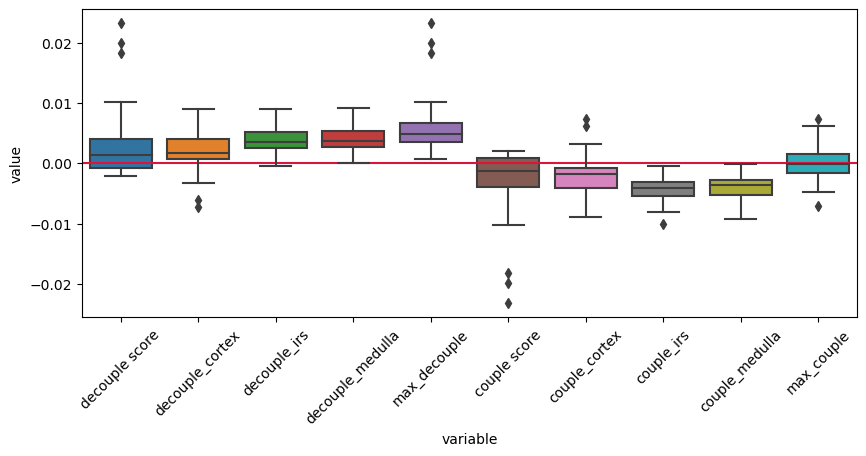

In [759]:
plt.figure(figsize=(10,4))
plt.axhline(y=0.0, color='crimson') 
sns.boxplot(data=cell_cycle_df, x="variable", y="value")
plt.xticks(rotation=45)

In [81]:
cell_cycle_genes = score_df[score_df.gene.isin(cell_cycle_genes) ].gene.to_list()
print(cell_cycle_genes)



['DCTN1', 'WNT5A', 'BLM', 'CDC25A', 'CENPC1', 'TOPBP1', 'EXOC6B', 'BRD8', 'PTCH1', 'RPTOR', 'INCENP', 'PPP1R12A', 'CPSF3', 'LIG1', 'SDCCAG8', 'MKI67', 'SMPD3', 'CEP164', 'EDNRA', 'SMC2', 'MCM4', 'TXNIP', 'ACVR1B', 'ADARB1', 'AZIN1', 'CTDSP2', 'DAB2IP', 'FGFR1', 'FGFR2', 'FGFR3', 'LEF1', 'MICAL3', 'OVOL1', 'PRKCD', 'SIK1', 'TACC2', 'TRP53BP2']


In [84]:

path = "hair_gene_peak/cellcycle/"
for genename in cell_cycle_genes:
    warnings.filterwarnings('ignore')
    get_gene_local_atac(genename, litemodel, rna_data, atac_data, norm_X)
    save = path+genename+".jpg"
    try:
        smooth_gene_peaks_plot_interv(genename, time="latent_time_8", rna_data=rna_data, linewidth=1, ticks=True, title=True, gcolor="greenyellow", pcolor="darkviolet",save=save)
    except:
        print(genename)   

BLM
INCENP
SMPD3
FGFR1


In [85]:
score_df

,gene,decouple score,couple score,decouple_irs,couple_irs,decouple_medulla,couple_medulla,decouple_cortex,couple_cortex,super_enhancer
0,ENOX1,-0.000945,0.000935,0.004521,-0.005521,0.003825,-0.003835,0.002865,-0.002875,False
1,DCTN1,0.018243,-0.018253,0.006778,-0.007778,0.008291,-0.008301,0.007041,-0.007051,False
2,MAGI1,-0.000338,0.000328,0.002241,-0.003241,0.001318,-0.001328,0.004055,-0.004065,False
3,FBRSL1,0.010025,-0.010035,0.004106,-0.005106,0.005154,-0.005164,0.002251,-0.002261,False
4,KIF15,0.015386,-0.015396,0.001594,-0.002594,0.001483,-0.001493,0.003783,-0.003793,False
...,...,...,...,...,...,...,...,...,...,...
112,TRP53BP2,0.001324,-0.001334,0.002834,-0.002844,0.002834,-0.002844,0.008988,-0.008998,True
113,VGLL4,0.003160,-0.003170,0.004661,-0.004671,0.004661,-0.004671,-0.002871,0.002861,True
114,ZFAND5,0.005131,-0.005141,0.005753,-0.005763,0.005753,-0.005763,0.003216,-0.003226,True
115,ZFP750,0.001823,-0.001833,0.005073,-0.005083,0.005073,-0.005083,-0.000018,0.000008,True


In [143]:
cortexrna = rna_data[(rna_data.obs.celltype!="IRS")]
cortexrna = cortexrna[(cortexrna.obs.celltype!="Medulla")]
cortexatac = atac_data[(atac_data.obs.celltype!="IRS")]
cortexatac = cortexatac[(cortexatac.obs.celltype!="Medulla")]
decouple_score_cortex = []
couple_score_cortex = []

irsrna = rna_data[(rna_data.obs.celltype!="Hair Shaft-cuticle.cortex")]
irsrna = irsrna[(irsrna.obs.celltype!="Medulla")]
irsatac = atac_data[(atac_data.obs.celltype!="Hair Shaft-cuticle.cortex")]
irsatac = irsatac[(irsatac.obs.celltype!="Medulla")]
decouple_score_irs = []
couple_score_irs = []

medullarna = rna_data[(rna_data.obs.celltype!="Hair Shaft-cuticle.cortex")]
medullarna = medullarna[(medullarna.obs.celltype!="IRS")]
medullaatac = atac_data[(atac_data.obs.celltype!="Hair Shaft-cuticle.cortex")]
medullaatac = medullaatac[(medullaatac.obs.celltype!="IRS")]

non_m_rna = rna_data[(rna_data.obs.celltype!="Medulla")]
non_m_atac = atac_data[(atac_data.obs.celltype!="Medulla")]

decouple_score_irs = []
couple_score_irs = []

decouple_score_medulla = []
couple_score_medulla = []

decouple_scores = []
couple_scores = []

genelist = score_df.gene.to_list()
failed = []
from tqdm import tqdm



In [ ]:
for i in tqdm(range(len(genelist))):
    genename = genelist[i]
    time = "latent_time"
    try: 

        decouple_score_c, _, _, couple_score_c = gene_level_casual_nonzero(genename,time, litemodel,cortexrna,cortexatac, norm_X=cortexatac.layers["norm"],width=0.1, thresh=1e-5)
        decouple_score_cortex.append(decouple_score_c)
        couple_score_cortex.append(couple_score_c)
        score_df[score_df.gene==genename]["decouple_cortex"] = decouple_score_c
        score_df[score_df.gene==genename]["couple_cortex"] = couple_score_c

        decouple_score_i, _, _, couple_score_i = gene_level_casual_nonzero(genename,time, litemodel,irsrna,irsatac, norm_X=irsatac.layers["norm"],width=0.1, thresh=1e-5)
        decouple_score_irs.append(decouple_score_i)
        couple_score_irs.append(couple_score_i)
        score_df[score_df.gene==genename]["decouple_irs"] = decouple_score_i
        score_df[score_df.gene==genename]["couple_irs"] = couple_score_i


        decouple_score_m, _, _, couple_score_m = gene_level_casual_nonzero(genename,time, litemodel,medullarna,medullaatac, norm_X=medullaatac.layers["norm"],width=0.1, thresh=1e-5)
        decouple_score_medulla.append(decouple_score_m)
        couple_score_medulla.append(couple_score_m)
        score_df[score_df.gene==genename]["decouple_medulla"] = decouple_score_m
        score_df[score_df.gene==genename]["couple_medulla"] = couple_score_m


        decouple_score, _, _, couple_score = gene_level_casual_nonzero(genename,time, litemodel,rna_data,atac_data, norm_X=atac_data.layers["norm"],width=0.1, thresh=1e-5)
        decouple_scores.append(decouple_score)
        couple_scores.append(couple_score)
        score_df[score_df.gene==genename]["decouple score"] = decouple_score
        score_df[score_df.gene==genename]["couple score"] = couple_score
    except:
        print(genename)
        failed.append(genename)

score_df



In [119]:
score_df.to_csv("hair_gene_peak/score_full.csv")

In [106]:
score_df["max_decouple"] =  score_df[['decouple score', 'decouple_medulla', 'decouple_cortex', "decouple_irs"]].max(axis=1)
score_df["max_couple"] =  score_df[['couple score', 'couple_medulla', 'couple_cortex', "couple_irs"]].max(axis=1)
score_df_melt = pd.melt(score_df, id_vars=["gene"], 
value_vars=["decouple score", "decouple_cortex","decouple_irs", "decouple_medulla", "max_decouple","couple score","couple_cortex","couple_irs", "couple_medulla","max_couple"])
score_df_melt

,gene,variable,value
0,ENOX1,decouple score,-0.000945
1,DCTN1,decouple score,0.018243
2,MAGI1,decouple score,-0.000338
3,FBRSL1,decouple score,0.010025
4,KIF15,decouple score,0.015386
...,...,...,...
2745,TRP53BP2,max_couple,-0.001334
2746,VGLL4,max_couple,0.002861
2747,ZFAND5,max_couple,-0.003226
2748,ZFP750,max_couple,0.000008


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'decouple score'),
  Text(1, 0, 'decouple_cortex'),
  Text(2, 0, 'decouple_irs'),
  Text(3, 0, 'decouple_medulla'),
  Text(4, 0, 'max_decouple'),
  Text(5, 0, 'couple score'),
  Text(6, 0, 'couple_cortex'),
  Text(7, 0, 'couple_irs'),
  Text(8, 0, 'couple_medulla'),
  Text(9, 0, 'max_couple')])

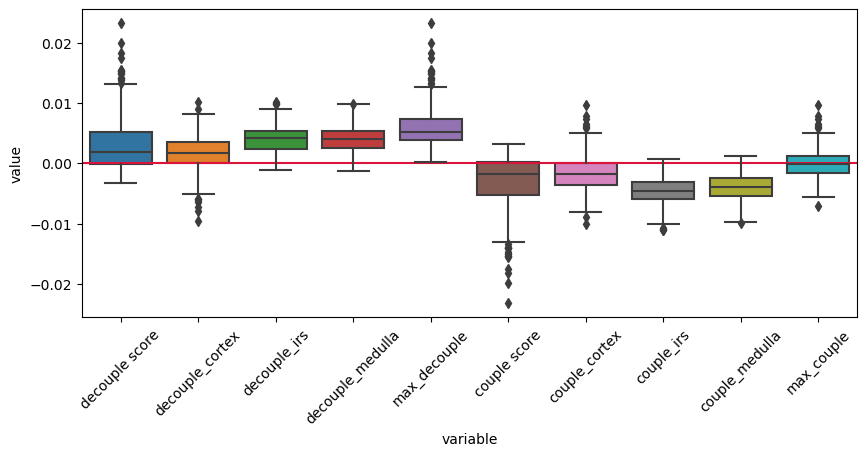

In [108]:
import seaborn as sns
plt.figure(figsize=(10,4))
plt.axhline(y=0.0, color='crimson') 
sns.boxplot(data=score_df_melt, x="variable", y="value")
plt.xticks(rotation=45)

In [113]:
score_df2 = pd.DataFrame({"gene":score_df.gene, "couple_score": couple_scores, "decouple_score": decouple_scores, "decouple_irs":decouple_score_irs, 
                        "couple_irs":couple_score_irs, "decouple_cortex":decouple_score_cortex, "couple_cortex":couple_score_cortex, 
                        "decouple_medulla":decouple_score_medulla, "couple_medulla":couple_score_medulla})
score_df2                        

,gene,couple_score,decouple_score,decouple_irs,couple_irs,decouple_cortex,couple_cortex,decouple_medulla,couple_medulla
0,ENOX1,-0.005306,0.005296,-0.006117,0.006107,0.005971,-0.005981,-0.001292,0.001282
1,DCTN1,-0.002297,0.002287,-0.001700,0.001690,-0.000512,0.000502,0.001317,-0.001327
2,MAGI1,0.016544,-0.016554,-0.001090,0.001080,-0.007149,0.007139,0.003968,-0.003978
3,FBRSL1,-0.000407,0.000397,0.006046,-0.006056,0.001441,-0.001451,0.009925,-0.009935
4,KIF15,-0.001201,0.001191,-0.000779,0.000769,0.001461,-0.001471,0.002616,-0.002626
...,...,...,...,...,...,...,...,...,...
112,TRP53BP2,-0.004417,0.004407,0.006183,-0.006193,0.004001,-0.004011,-0.003781,0.003771
113,VGLL4,-0.000667,0.000657,0.006380,-0.006390,0.004686,-0.004696,0.004370,-0.004380
114,ZFAND5,0.002957,-0.002967,-0.001430,0.001420,0.001426,-0.001436,0.001910,-0.001920
115,ZFP750,-0.014534,0.014524,0.016083,-0.016093,0.007929,-0.007939,0.001610,-0.001620


In [114]:
score_df2["max_decouple"] =  score_df2[['decouple_score', 'decouple_medulla', 'decouple_cortex', "decouple_irs"]].max(axis=1)
score_df2["max_couple"] =  score_df2[['couple_score', 'couple_medulla', 'couple_cortex', "couple_irs"]].max(axis=1)
score_df_melt2 = pd.melt(score_df2, id_vars=["gene"], 
value_vars=["decouple_score", "decouple_cortex","decouple_irs", "decouple_medulla", "max_decouple","couple_score","couple_cortex","couple_irs", "couple_medulla","max_couple"])
score_df_melt2

,gene,variable,value
0,ENOX1,decouple_score,0.005296
1,DCTN1,decouple_score,0.002287
2,MAGI1,decouple_score,-0.016554
3,FBRSL1,decouple_score,0.000397
4,KIF15,decouple_score,0.001191
...,...,...,...
2745,TRP53BP2,max_couple,0.003771
2746,VGLL4,max_couple,-0.000667
2747,ZFAND5,max_couple,0.002957
2748,ZFP750,max_couple,-0.001620


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'decouple score'),
  Text(1, 0, 'decouple_cortex'),
  Text(2, 0, 'decouple_irs'),
  Text(3, 0, 'decouple_medulla'),
  Text(4, 0, 'max_decouple'),
  Text(5, 0, 'couple score'),
  Text(6, 0, 'couple_cortex'),
  Text(7, 0, 'couple_irs'),
  Text(8, 0, 'couple_medulla'),
  Text(9, 0, 'max_couple')])

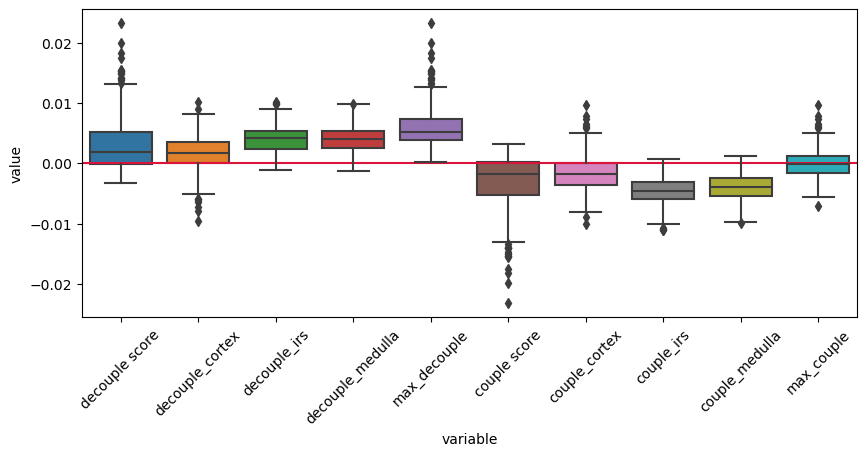

In [115]:
plt.figure(figsize=(10,4))
plt.axhline(y=0.0, color='crimson') 
sns.boxplot(data=score_df_melt, x="variable", y="value")
plt.xticks(rotation=45)

In [116]:
score_df2.to_csv("hair_gene_peak/score_full_new.csv")

In [117]:
score_en = score_df[score_df.super_enhancer==True]

score_en_melt = pd.melt(score_en, id_vars=["gene"], 
value_vars=["decouple score", "decouple_cortex","decouple_irs", "decouple_medulla", "max_decouple","couple score","couple_cortex","couple_irs", "couple_medulla","max_couple"])
score_en_melt


,gene,variable,value
0,ABL2,decouple score,0.012185
1,ACVR1B,decouple score,0.001306
2,ADARB1,decouple score,-0.001576
3,AFF3,decouple score,0.007347
4,AGPAT3,decouple score,0.000129
...,...,...,...
1165,TRP53BP2,max_couple,-0.001334
1166,VGLL4,max_couple,0.002861
1167,ZFAND5,max_couple,-0.003226
1168,ZFP750,max_couple,0.000008


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'decouple score'),
  Text(1, 0, 'decouple_cortex'),
  Text(2, 0, 'decouple_irs'),
  Text(3, 0, 'decouple_medulla'),
  Text(4, 0, 'max_decouple'),
  Text(5, 0, 'couple score'),
  Text(6, 0, 'couple_cortex'),
  Text(7, 0, 'couple_irs'),
  Text(8, 0, 'couple_medulla'),
  Text(9, 0, 'max_couple')])

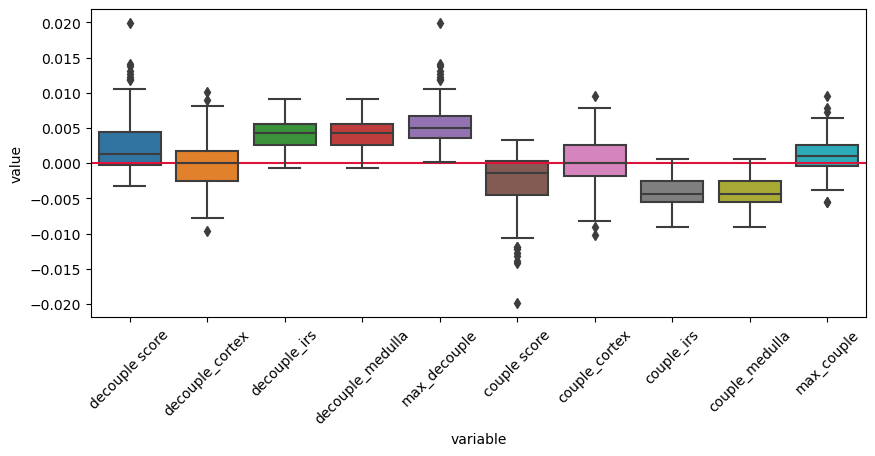

In [118]:
plt.figure(figsize=(10,4))
plt.axhline(y=0.0, color='crimson') 
sns.boxplot(data=score_en_melt, x="variable", y="value")
plt.xticks(rotation=45)

In [121]:
score_df[score_df.super_enhancer==True].sort_values("decouple score", ascending=False).head(30)

,gene,decouple score,couple score,decouple_irs,couple_irs,decouple_medulla,couple_medulla,decouple_cortex,couple_cortex,super_enhancer,max_decouple,max_couple
31,FGFR3,0.019872,-0.019882,0.003092,-0.003102,0.003092,-0.003102,-0.007332,0.007322,True,0.019872,0.007322
97,SLC23A2,0.014120,-0.014130,0.004692,-0.004702,0.004692,-0.004702,-0.001854,0.001844,True,0.014120,0.001844
86,PXN,0.013842,-0.013852,0.005562,-0.005572,0.005562,-0.005572,0.008092,-0.008102,True,0.013842,-0.005572
61,MAML3,0.013128,-0.013138,0.006636,-0.006646,0.006636,-0.006646,0.005507,-0.005517,True,0.013128,-0.005517
23,DNAJB1,0.012668,-0.012678,0.002335,-0.002345,0.002335,-0.002345,0.000612,-0.000622,True,0.012668,-0.000622
0,ABL2,0.012185,-0.012195,0.002398,-0.002408,0.002398,-0.002408,-0.001876,0.001866,True,0.012185,0.001866
70,NFKBIA,0.011952,-0.011962,0.004743,-0.004753,0.004743,-0.004753,0.003289,-0.003299,True,0.011952,-0.003299
40,GSE1,0.011888,-0.011898,0.006049,-0.006059,0.006049,-0.006059,0.000228,-0.000238,True,0.011888,-0.000238
51,JAG1,0.010571,-0.010581,0.003084,-0.003094,0.003084,-0.003094,-0.001643,0.001633,True,0.010571,0.001633
96,SIK1,0.010228,-0.010238,0.005319,-0.005329,0.005319,-0.005329,0.001591,-0.001601,True,0.010228,-0.001601


In [129]:
score_df[score_df.gene.isin(["ACVR1B", "AGPAT3", "GSE1", "BTG2", "DLX3", "DNAJB1", "NOTCH1", "MYO18A", "ABL2"])]

,gene,decouple score,couple score,decouple_irs,couple_irs,decouple_medulla,couple_medulla,decouple_cortex,couple_cortex,super_enhancer,max_decouple,max_couple
0,ABL2,0.012185,-0.012195,0.002398,-0.002408,0.002398,-0.002408,-0.001876,0.001866,True,0.012185,0.001866
1,ACVR1B,0.001306,-0.001316,0.008148,-0.008158,0.008148,-0.008158,0.000872,-0.000882,True,0.008148,-0.000882
4,AGPAT3,0.000129,-0.000139,0.003580,-0.003590,0.003580,-0.003590,-0.001761,0.001751,True,0.003580,0.001751
11,BTG2,0.002733,-0.002743,0.005464,-0.005474,0.005464,-0.005474,-0.007845,0.007835,True,0.005464,0.007835
22,DLX3,0.009419,-0.009429,0.005957,-0.005967,0.005957,-0.005967,-0.001332,0.001322,True,0.009419,0.001322
23,DNAJB1,0.012668,-0.012678,0.002335,-0.002345,0.002335,-0.002345,0.000612,-0.000622,True,0.012668,-0.000622
40,GSE1,0.011888,-0.011898,0.006049,-0.006059,0.006049,-0.006059,0.000228,-0.000238,True,0.011888,-0.000238
68,MYO18A,0.002243,-0.002253,0.001700,-0.001710,0.001700,-0.001710,0.002868,-0.002878,True,0.002868,-0.001710
72,NOTCH1,0.002210,-0.002220,0.000601,-0.000611,0.000601,-0.000611,-0.002951,0.002941,True,0.002210,0.002941


In [131]:
score_df[score_df.gene.isin(["BLM", "FGFR1", "SIK1", "BTG2", "DLX3", "DNAJB1", "NOTCH1", "MYO18A", "ABL2"])]

,gene,decouple score,couple score,decouple_irs,couple_irs,decouple_medulla,couple_medulla,decouple_cortex,couple_cortex,super_enhancer,max_decouple,max_couple
18,BLM,0.003275,-0.003285,0.000936,-0.001936,0.000989,-0.000999,0.001140,-0.001150,False,0.003275,-0.000999
0,ABL2,0.012185,-0.012195,0.002398,-0.002408,0.002398,-0.002408,-0.001876,0.001866,True,0.012185,0.001866
11,BTG2,0.002733,-0.002743,0.005464,-0.005474,0.005464,-0.005474,-0.007845,0.007835,True,0.005464,0.007835
22,DLX3,0.009419,-0.009429,0.005957,-0.005967,0.005957,-0.005967,-0.001332,0.001322,True,0.009419,0.001322
23,DNAJB1,0.012668,-0.012678,0.002335,-0.002345,0.002335,-0.002345,0.000612,-0.000622,True,0.012668,-0.000622
29,FGFR1,-0.001705,0.001695,0.004405,-0.004415,0.004405,-0.004415,0.001708,-0.001718,True,0.004405,0.001695
68,MYO18A,0.002243,-0.002253,0.001700,-0.001710,0.001700,-0.001710,0.002868,-0.002878,True,0.002868,-0.001710
72,NOTCH1,0.002210,-0.002220,0.000601,-0.000611,0.000601,-0.000611,-0.002951,0.002941,True,0.002210,0.002941
96,SIK1,0.010228,-0.010238,0.005319,-0.005329,0.005319,-0.005329,0.001591,-0.001601,True,0.010228,-0.001601


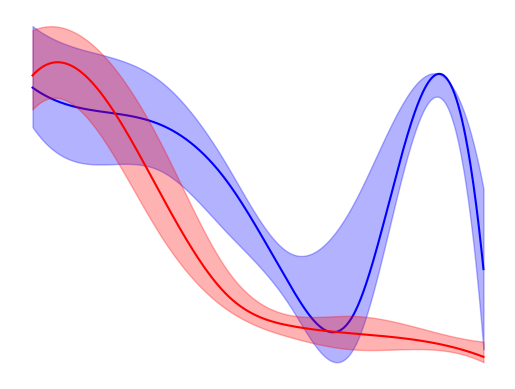

In [143]:
genename = "MT2"
genename = genename.upper()
get_gene_local_atac(genename, litemodel, irsrna, irsatac, norm_X=irsatac.layers["norm"])
smooth_gene_peaks_plot_interv(genename, rna_data=irsrna,time="latent_time_8",linewidth = 2, points=500, pcolor="black"), 

In [145]:
# cellcycle genes
score_cc = score_df[score_df.super_enhancer==False]
score_cc = score_cc[score_cc.gene.isin(cell_cycle_genes)]
score_cc_melt = pd.melt(score_cc, id_vars=["gene"], 
value_vars=["decouple score", "decouple_cortex","decouple_irs", "decouple_medulla", "max_decouple","couple score","couple_cortex","couple_irs", "couple_medulla","max_couple"])
score_cc_melt

,gene,variable,value
0,DCTN1,decouple score,0.018243
1,WNT5A,decouple score,0.004818
2,BLM,decouple score,0.003275
3,CDC25A,decouple score,-0.001577
4,CENPC1,decouple score,-0.000729
...,...,...,...
215,CEP164,max_couple,-0.001631
216,EDNRA,max_couple,-0.001084
217,SMC2,max_couple,-0.000398
218,MCM4,max_couple,-0.002704


In [150]:
score_df[(score_df['decouple score']>0) & (score_df['decouple_irs']>0)
 & (score_df['decouple_cortex']>0) & (score_df['decouple_medulla']>0)].sort_values("decouple score", ascending=False)

,gene,decouple score,couple score,decouple_irs,couple_irs,decouple_medulla,couple_medulla,decouple_cortex,couple_cortex,super_enhancer,max_decouple,max_couple
104,PPP1R12A,0.023221,-0.023231,0.002889,-0.003889,0.003445,-0.003455,0.004290,-0.004300,False,0.023221,-0.003455
1,DCTN1,0.018243,-0.018253,0.006778,-0.007778,0.008291,-0.008301,0.007041,-0.007051,False,0.018243,-0.007051
38,TFG,0.015517,-0.015527,0.004899,-0.005899,0.006633,-0.006643,0.002587,-0.002597,False,0.015517,-0.002597
4,KIF15,0.015386,-0.015396,0.001594,-0.002594,0.001483,-0.001493,0.003783,-0.003793,False,0.015386,-0.001493
19,LRP4,0.015327,-0.015337,0.002748,-0.003748,0.004330,-0.004340,0.004200,-0.004210,False,0.015327,-0.003748
...,...,...,...,...,...,...,...,...,...,...,...,...
94,SGK1,0.000246,-0.000256,0.006640,-0.006650,0.006640,-0.006650,0.000016,-0.000026,True,0.006640,-0.000026
20,PCDH7,0.000243,-0.000253,0.004745,-0.005745,0.006263,-0.006273,0.003209,-0.003219,False,0.006263,-0.000253
129,2610507B11RIK,0.000128,-0.000138,0.005501,-0.006501,0.003907,-0.003917,0.001370,-0.001380,False,0.005501,-0.000138
70,RNF115,0.000060,-0.000070,0.010041,-0.011041,0.009875,-0.009885,0.003056,-0.003066,False,0.010041,-0.000070


In [151]:
score_df[(score_df['super_enhancer']==True) & (score_df['decouple score']>0) & (score_df['decouple_irs']>0)
 & (score_df['decouple_cortex']>0) & (score_df['decouple_medulla']>0)].sort_values("decouple score", ascending=False)
 

,gene,decouple score,couple score,decouple_irs,couple_irs,decouple_medulla,couple_medulla,decouple_cortex,couple_cortex,super_enhancer,max_decouple,max_couple
86,PXN,0.013842,-0.013852,0.005562,-0.005572,0.005562,-0.005572,0.008092,-0.008102,True,0.013842,-0.005572
61,MAML3,0.013128,-0.013138,0.006636,-0.006646,0.006636,-0.006646,0.005507,-0.005517,True,0.013128,-0.005517
23,DNAJB1,0.012668,-0.012678,0.002335,-0.002345,0.002335,-0.002345,0.000612,-0.000622,True,0.012668,-0.000622
70,NFKBIA,0.011952,-0.011962,0.004743,-0.004753,0.004743,-0.004753,0.003289,-0.003299,True,0.011952,-0.003299
40,GSE1,0.011888,-0.011898,0.006049,-0.006059,0.006049,-0.006059,0.000228,-0.000238,True,0.011888,-0.000238
96,SIK1,0.010228,-0.010238,0.005319,-0.005329,0.005319,-0.005329,0.001591,-0.001601,True,0.010228,-0.001601
42,HOXB6,0.009646,-0.009656,0.006755,-0.006765,0.006755,-0.006765,0.000316,-0.000326,True,0.009646,-0.000326
66,MT1,0.007668,-0.007678,0.002541,-0.002551,0.002541,-0.002551,0.001452,-0.001462,True,0.007668,-0.001462
3,AFF3,0.007347,-0.007357,0.004707,-0.004717,0.004707,-0.004717,0.001927,-0.001937,True,0.007347,-0.001937
60,MACF1,0.006455,-0.006465,0.004848,-0.004858,0.004848,-0.004858,0.002213,-0.002223,True,0.006455,-0.002223


In [116]:
score_df[score_df.gene=="WNT3"]

,Unnamed: 0,gene,decouple score,couple score,decouple_irs,couple_irs,decouple_medulla,couple_medulla,decouple_cortex,couple_cortex,super_enhancer,max_decouple,max_couple


In [71]:
irs_df = score_df[(score_df['decouple score']<0) & (score_df['decouple_irs']>0)].sort_values("decouple_irs", ascending=False)

In [111]:
irs_df.to_csv("hair_gene_peak/IRS_decouple.csv")

In [101]:
import warnings
path = "hair_gene_peak/IRS/marker/"
for genename in ["MT2", "CTSC", "KRT71", "KRT28", "TCHH", "BAMBI"]:
    warnings.filterwarnings('ignore')
    save = path+genename+".jpg"
    try:
        get_gene_local_atac(genename, litemodel, irsrna, irsatac, norm_X=irsatac.layers["norm"])

        smooth_gene_peaks_plot_interv(genename, time="latent_time_8", rna_data=irsrna, linewidth=1, ticks=True, title=True, gcolor="greenyellow", pcolor="darkviolet",save=save)
    except:
        print(genename)   

In [110]:
import warnings
path = "hair_gene_peak/IRS/marker/TF/"
for genename in ["CUX1", "GRHL1", "GATA3", "MAF"]:
    warnings.filterwarnings('ignore')
    save = path+genename+".jpg"
    try:
        get_gene_local_atac(genename, litemodel, irsrna, irsatac, norm_X=irsatac.layers["norm"])

        smooth_gene_peaks_plot_interv(genename, time="latent_time_8", rna_data=irsrna, linewidth=1, ticks=True, title=True, gcolor="greenyellow", pcolor="darkviolet",save=save)
    except:
        print(genename)   

In [115]:
[e for e in rna_data.var.index if "TCF" in e]

['TCF3', 'TCF7L2']

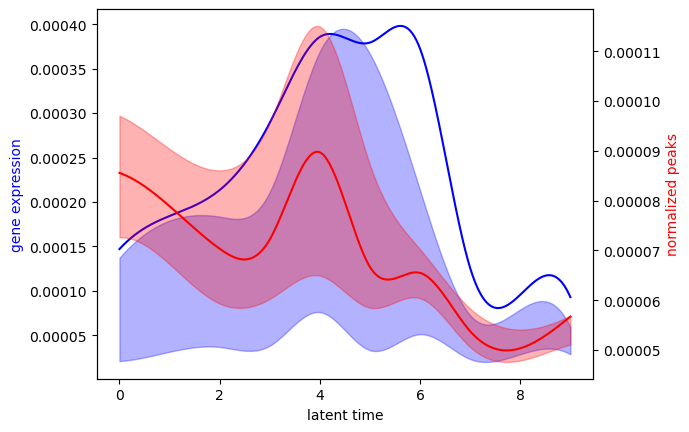

In [213]:

# def smooth_gene_peaks_plot_interv_2(genename,time, litemodel, rna_data, atac_data, linewidth, points=1000, save=False, legend=True, ticks=True, gcolor="b", pcolor="r", shade=0.3, title=False):

# rna_data.layers["counts"] = rna_data.X
# rna_data.X = rna_data.layers["norm"]

genename = "WNT3"
# get_gene_local_atac(genename, litemodel, non_m_rna, non_m_atac, norm_X=non_m_atac.layers["norm"])

smooth_gene_peaks_plot_interv_2(genename, time="latent_time_10", litemodel=litemodel, rna_data=rna_data, atac_data=atac_data, norm_X = atac_data.layers["norm"],linewidth=1, ticks=True, title=True)

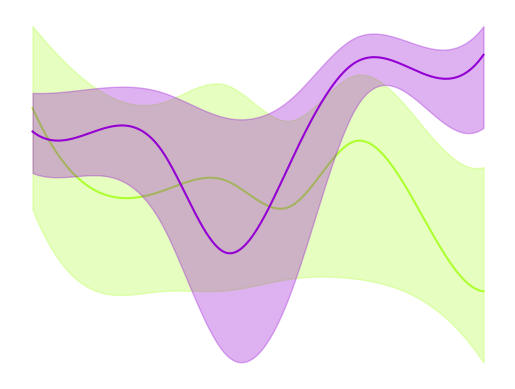

In [180]:
genename = "GATA3"
get_gene_local_atac(genename, litemodel, rna_data, atac_data, norm_X=atac_data.layers["norm"])
smooth_gene_peaks_plot_interv(genename, time="latent_time_8", rna_data=rna_data, linewidth=1, ticks=True, title=True, gcolor="greenyellow", pcolor="darkviolet")

In [175]:
rna_data[:, ["GATA3"]].X.toarray()

array([[0.      ],
       [3.452557],
       [0.      ],
       ...,
       [0.      ],
       [0.      ],
       [0.      ]], dtype=float32)

In [140]:
rna_data.obs

,atac.bc,celltype,latent_time,batch_id,modality,_scvi_batch,_scvi_labels,epxr_latent_0,epxr_latent_1,epxr_latent_2,...,topic_13,softmax_denom,latent_time_cat,latent_time_2,latent_time_10,latent_time_3,latent_time_8,latent_time_6,local_peaks,temp_gene
0_paired,"R1.01,R2.06,R3.83,P1.07",TAC-1,0.366586,1,paired,0,0,-0.329691,0.349999,-0.094741,...,0.037365,691.534485,7,18,3,1,2,2,0.000046,0.0
1_paired,"R1.01,R2.11,R3.86,P1.08",TAC-1,0.387718,1,paired,0,0,-0.209401,1.059089,0.475534,...,0.024248,731.563538,7,19,3,1,3,2,0.000044,0.0
2_paired,"R1.01,R2.15,R3.09,P1.07",TAC-1,0.147633,1,paired,0,0,-0.547288,-0.103089,0.148641,...,0.061180,689.161011,2,7,1,0,1,0,0.000070,0.0
3_paired,"R1.01,R2.17,R3.81,P1.05",TAC-1,0.356577,1,paired,0,0,-0.258864,-0.088589,-1.091653,...,0.038850,683.340515,7,17,3,1,2,2,0.000041,0.0
4_paired,"R1.01,R2.18,R3.95,P1.06",TAC-1,0.131708,1,paired,0,0,0.651902,0.508803,-0.290743,...,0.176798,658.140930,2,6,1,0,1,0,0.000047,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6431_paired,"R1.96,R2.73,R3.72,P1.08",Hair Shaft-cuticle.cortex,0.345225,1,paired,0,0,0.450251,0.547970,-0.263151,...,0.051342,598.397949,6,17,3,1,2,2,0.000066,0.0
6432_paired,"R1.96,R2.82,R3.52,P1.07",Hair Shaft-cuticle.cortex,0.313259,1,paired,0,0,0.781673,-0.192597,0.503431,...,0.013886,582.944275,6,15,3,1,2,1,0.000121,0.0
6433_paired,"R1.96,R2.83,R3.68,P1.06",Hair Shaft-cuticle.cortex,0.343906,1,paired,0,0,-0.965674,0.367740,-0.886593,...,0.055417,621.422241,6,17,3,1,2,2,0.000091,0.0
6434_paired,"R1.96,R2.87,R3.63,P1.07",Hair Shaft-cuticle.cortex,0.475595,1,paired,0,0,1.658696,-1.205393,0.108684,...,0.011257,589.000793,9,23,4,2,3,2,0.000142,0.0


In [141]:
gene_level_casual_nonzero("WNT3","latent_time_6", litemodel,rna_data,atac_data, norm_X=atac_data.layers["norm"],width=0.1, thresh=1e-5)


KeyboardInterrupt: 

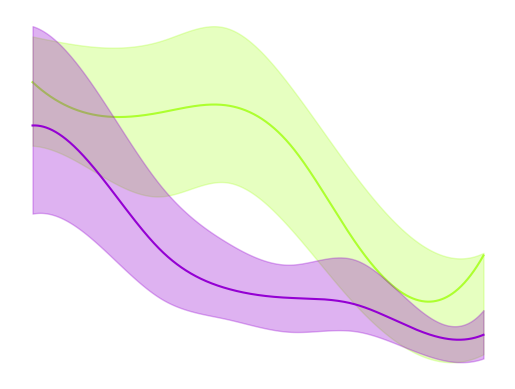

In [128]:
genename = "LEF1"
get_gene_local_atac(genename, litemodel, rna_data, atac_data, norm_X=atac_data.layers["norm"])
smooth_gene_peaks_plot_interv(genename, time="latent_time_8", rna_data=rna_data, linewidth=1, ticks=True, title=True, gcolor="greenyellow", pcolor="darkviolet")

In [133]:
genename = "WNT5A"
get_gene_local_atac(genename, litemodel, cortexrna, cortexatac, norm_X=cortexatac.layers["norm"])
smooth_gene_peaks_plot_interv(genename, time="latent_time_8", rna_data=cortexrna, linewidth=1, ticks=True, title=True, gcolor="greenyellow", pcolor="darkviolet")

ValueError: Array must not contain infs or nans.